In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('Iris.csv')

In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [41]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [42]:
df.shape

(150, 6)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [44]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [45]:
df.isna().apply(pd.value_counts).T

,False
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [46]:
#Data Preparation
X = df.drop(['Id','Species'],axis=1)
y = df[['Species']]

In [47]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [49]:
corr=df.corr()

In [50]:
corr[['SepalLengthCm']]

,SepalLengthCm
Id,0.716676
SepalLengthCm,1.000000
SepalWidthCm,-0.109369
PetalLengthCm,0.871754
PetalWidthCm,0.817954


In [51]:
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [53]:
#Importing KNN
from sklearn.neighbors import KNeighborsClassifier

In [54]:
#Create the model
model = KNeighborsClassifier(n_neighbors=3)

In [55]:
#Training the model/Tell the model to Learn KNN
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred = model.predict(X_test)

In [72]:
len(y_pred)

45

In [76]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

Iris-versicolor    19
Iris-setosa        14
Iris-virginica     12
dtype: int64

In [59]:
model.score(X_test,y_test)*100

97.77777777777777

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred)*100

97.77777777777777

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [64]:
cf = confusion_matrix(y_test,y_pred)

In [65]:
cf

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

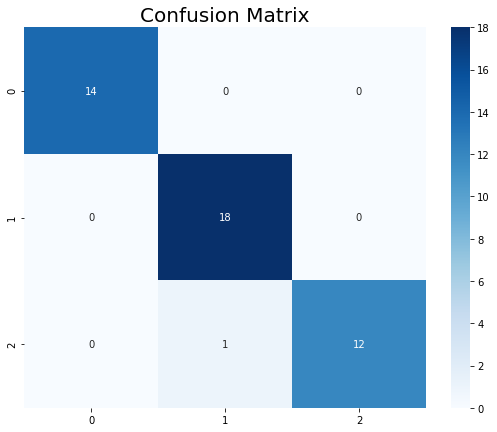

In [68]:
plt.figure(figsize=(9,7))
plt.title('Confusion Matrix',fontsize=20)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.show()

In [75]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [70]:
y_test.value_counts()

Species        
Iris-versicolor    18
Iris-setosa        14
Iris-virginica     13
dtype: int64

In [77]:
y_pred.value_counts()

Iris-versicolor    19
Iris-setosa        14
Iris-virginica     12
dtype: int64